In [55]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras

In [56]:
from keras.datasets import reuters

In [57]:
(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words = 10000)

In [58]:
def vectorize(sequences,dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [59]:
x_train2 = vectorize(x_train)
x_test2 = vectorize(x_test)

In [60]:
y_train2 = tf.keras.utils.to_categorical(y_train)
y_test2 = tf.keras.utils.to_categorical(y_test)

In [61]:
x_total = x_train2[:7000,:]
x_val = x_train2[7000:,:]

In [62]:
y_total = y_train2[:7000,:]
y_val = y_train2[7000:,:]

In [63]:
from keras import layers
from keras import models

In [93]:
model = models.Sequential()
model.add(layers.Dense(64,activation = "relu",input_shape = (10000,)))
model.add(layers.Dense(32,activation = "tanh"))
model.add(layers.Dense(46,activation = "softmax"))

In [94]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [95]:
history = model.fit(x_total, y_total, epochs = 10,batch_size = 512, validation_data = (x_val,y_val))

Train on 7000 samples, validate on 1982 samples
Epoch 1/10
7000/7000 [==============================] - 2s 246us/step - loss: 2.8842 - accuracy: 0.4870 - val_loss: 2.1348 - val_accuracy: 0.6292
Epoch 2/10
7000/7000 [==============================] - 2s 229us/step - loss: 1.8133 - accuracy: 0.6606 - val_loss: 1.6124 - val_accuracy: 0.6948
Epoch 3/10
7000/7000 [==============================] - 2s 231us/step - loss: 1.3764 - accuracy: 0.7371 - val_loss: 1.3648 - val_accuracy: 0.7291
Epoch 4/10
7000/7000 [==============================] - 2s 232us/step - loss: 1.1191 - accuracy: 0.7891 - val_loss: 1.2368 - val_accuracy: 0.7376
Epoch 5/10
7000/7000 [==============================] - 2s 226us/step - loss: 0.9337 - accuracy: 0.8343 - val_loss: 1.1225 - val_accuracy: 0.7593
Epoch 6/10
7000/7000 [==============================] - 2s 227us/step - loss: 0.7829 - accuracy: 0.8720 - val_loss: 1.0582 - val_accuracy: 0.7770
Epoch 7/10
7000/7000 [==============================] - 2s 228us/step - loss

In [ ]:
model.evaluate(x_test2,y_test2)

In [70]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [71]:
import matplotlib.pylab as plt

Text(0, 0.5, 'Loss')

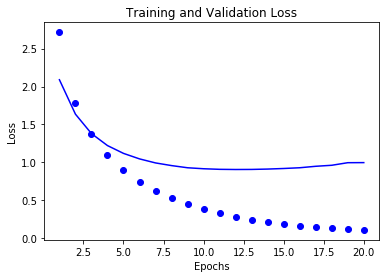

In [91]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(y) + 1)
plt.plot(epochs,train_loss,"bo",label = "Training Loss")
plt.plot(epochs,val_loss,"b",label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

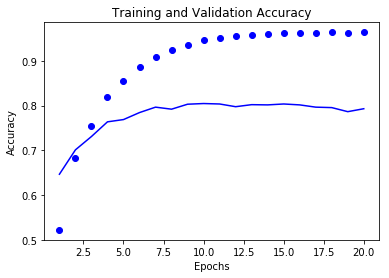

In [92]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(y) + 1)
plt.plot(epochs,train_acc,"bo",label = "Training Accuracy")
plt.plot(epochs,val_acc,"b",label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")